### Imports

In [438]:
import numpy as np
import matplotlib.pyplot as plt

## Illustration of Markov’s, Chebyshev’s, and Hoeffding’s Inequalities

In [439]:
# Number of repetitions
num_repetitions = 1000000

# Number of coin flips
num_coinflips = 20

#bias
bias = 0.5

# Simulate the experiments
experiments = np.random.binomial(num_coinflips, bias, num_repetitions)
# calculate the frequency of each experiment
experiment_frequency = experiments / num_coinflips
print(experiment_frequency)
# alpha values
a = np.arange(0.5, 1.05, 0.05)

[0.6  0.55 0.3  ... 0.45 0.65 0.6 ]


In [440]:

#check if the frequency is less than or equal to the alpha
test1 = []
for i in a:
    test = np.copy(experiment_frequency)
    test[test >= i]= True
    test[test < i]= False
    list1 = np.sum(test) / num_repetitions
    test1.append(list1)


/var/folders/13/wc261tq927j0bgfwz_31529r0000gn/T/ipykernel_9612/1059643948.py:7: RuntimeWarning: divide by zero encountered in true_divide
  Chebyshevs_bound = (0.5*(1-0.5))/((20 * (a-0.5)**2))


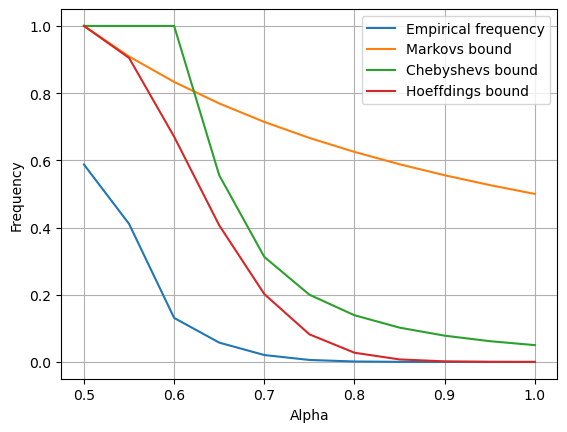

In [441]:


# Markovs inequality -
# P(X>=alpha)<=E(x)/alpha
Markovs_bound = 0.5/a

# Chebyshev's inequality -
# P(|X−E[X]|≥ε)≤ Var[X].
Chebyshevs_bound = (0.5*(1-0.5))/((20 * (a-0.5)**2))
for n in range(len(Chebyshevs_bound)):
    if Chebyshevs_bound[n] > 1:
       Chebyshevs_bound[n] = 1
       

# Hoeffding's inequality -
# P(|X−E[X]|≥ε)≤ 2exp(−2ε^2N)
Hoeffdings_bound = np.exp(-2*(a-0.5)**2*num_coinflips)




plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.grid(True)
plt.plot(a, test1, label = 'Empirical frequency')
plt.plot(a, Markovs_bound, label = 'Markovs bound')
plt.plot(a, Chebyshevs_bound, label = 'Chebyshevs bound')
plt.plot(a, Hoeffdings_bound, label = 'Hoeffdings bound')
plt.legend()

### For α = 1 and α = 0.95 calculate the exact probability P( 1/20  ∑ 20i=1 X_i ≥ α).

In [442]:
print(test1[9:11])

[0.0, 0.0]


### 2.b

[0.05 0.2  0.1  ... 0.05 0.15 0.05]


/var/folders/13/wc261tq927j0bgfwz_31529r0000gn/T/ipykernel_9612/1774754031.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Chebyshevs_bound_1 = 0.1*(1-0.1)/(20*(a-0.1)**2)


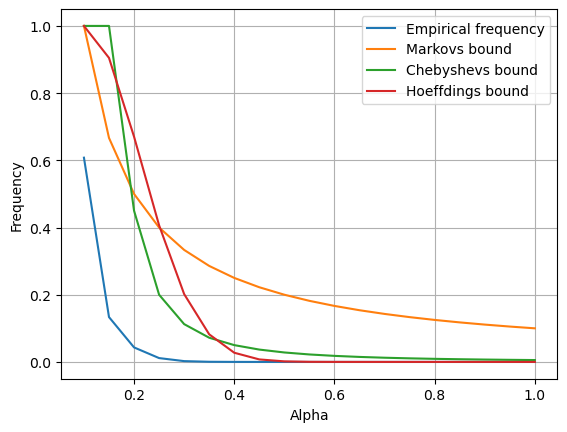

In [443]:
# Number of repetitions
num_repetitions = 1000000

# Number of coin flips
num_coinflips = 20

#bias
bias = 0.1

# Simulate the experiments
experiments = np.random.binomial(num_coinflips, bias, num_repetitions)
# calculate the frequency of each experiment
experiment_frequency = experiments / num_coinflips
print(experiment_frequency)
# alpha values
a = np.arange(0.1, 1.05, 0.05)


#check if the frequency is less than or equal to the alpha
test1 = []
for i in a:
    test = np.copy(experiment_frequency)
    test[test >= i]= True
    test[test < i]= False
    list1 = np.sum(test) / num_repetitions
    test1.append(list1)

# plot the histogram

# Markovs inequality -
# P(X>=alpha)<=E(x)/alpha
Markovs_bound_1 = 0.1/a
# for n in range(len(Markovs_bound_1)):
#     if Markovs_bound_1[n] > 1:
#        Markovs_bound_1[n] = 1

# Chebyshev's inequality -
# P(|X−E[X]|≥ε)≤ Var[X].
Chebyshevs_bound_1 = 0.1*(1-0.1)/(20*(a-0.1)**2)

for n in range(len(Chebyshevs_bound_1)):
    if Chebyshevs_bound_1[n] > 1:
       Chebyshevs_bound_1[n] = 1
       

    

# Hoeffding's inequality -
# P(|X−E[X]|≥ε)≤ 2exp(−2ε^2N)
Hoeffdings_bound_1 = np.exp(-2*(a-0.1)**2*num_coinflips)


plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.grid(True)
plt.plot(a, test1, label = 'Empirical frequency')
plt.plot(a, Markovs_bound_1, label = 'Markovs bound')
plt.plot(a, Chebyshevs_bound_1, label = 'Chebyshevs bound')
plt.plot(a, Hoeffdings_bound_1, label = 'Hoeffdings bound')
plt.legend()


# 2 The Role of Independence

In [444]:
# Design an example of identically distributed, but dependent Bernoulli random
# variables X1, . . . , Xn (i.e., Xi ∈ {0, 1}), such that



# 5 Linear Regression

In [445]:
import numpy as np

# Load the data
data = np.loadtxt('PCB.dt')

# Extract features (Fish age) and target (PCB concentration)
def extract_features_and_target(data):
    features = data[:, 0]
    target = data[:, -1]
    return features, target

Fish_age, PCB_concentration = extract_features_and_target(data)

# Add a column of ones to Fish_age to account for the intercept term
ones_column = np.ones_like(Fish_age)
X = np.column_stack((ones_column, Fish_age))
# Implement the linear regression algorithm
X_transpose = np.transpose(X)
coefficients = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(PCB_concentration)

# Calculate the Mean Squared Error (MSE)
predictions = X.dot(coefficients)
residuals = PCB_concentration - predictions
mse = (residuals.dot(residuals)) / len(PCB_concentration)

print("Coefficients (Intercept, Slope):", coefficients)
print("Mean Squared Error:", mse)


Coefficients (Intercept, Slope): [-1.45194395  1.55777052]
Mean Squared Error: 24.801064316570585


# 5.1

In [446]:
#Load the data
data = np.loadtxt('PCB.dt')

def ExtractFirst(list):
	return [item[0] for item in list]

def ExtractLast(list):
	return [item[-1] for item in list]
	
#split the data into two parts
Fish_age = ExtractFirst(data)
PCB_concentration = ExtractLast(data)

# Add a coloum of ones to Fish_age
ones_column = np.ones_like(Fish_age)
X = np.column_stack((Fish_age, ones_column))


coefficients = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(PCB_concentration)
print("Bias, Slope:",coefficients)

#calculate the mean square error
predictions = X.dot(coefficients)
residuals = PCB_concentration - predictions
mse = (residuals.dot(residuals)) / len(PCB_concentration)
print("Mean Squared Error:", mse)




Bias, Slope: [ 1.55777052 -1.45194395]
Mean Squared Error: 24.801064316570578


# 5.2

In [447]:


# Transform the target variable (natural logarithm)
Transformed_PCB_concentration = np.log(PCB_concentration)

# Build a linear model h'(x) = ax + b on the transformed data
# Add a column of ones to Fish_age to account for the intercept term
ones_column = np.ones_like(Fish_age)
Fish_age_transformed = np.column_stack((ones_column, Fish_age))
Transformed_coefficients = np.linalg.lstsq(Fish_age_transformed, Transformed_PCB_concentration, rcond=None)[0]

# Extract the learned parameters a and b
a = Transformed_coefficients[1]
b = Transformed_coefficients[0]



# We fit the model h'(x)=ax+b and the final model: h(x) = exp(h'(x))
def h_x(x):
    return np.exp(a * x + b)

vectorize = np.vectorize(h_x)

# Calculate the Mean Squared Error 
predictions = vectorize(Fish_age)
residuals = PCB_concentration - predictions
mse = (residuals.dot(residuals)) / len(PCB_concentration)

print("a, b:", a, b)
print("Mean Squared Error:", mse)


a, b: 0.2591282395640713 0.03147246971447636
Mean Squared Error: 34.83556116722034


# 5.3

# 5.4

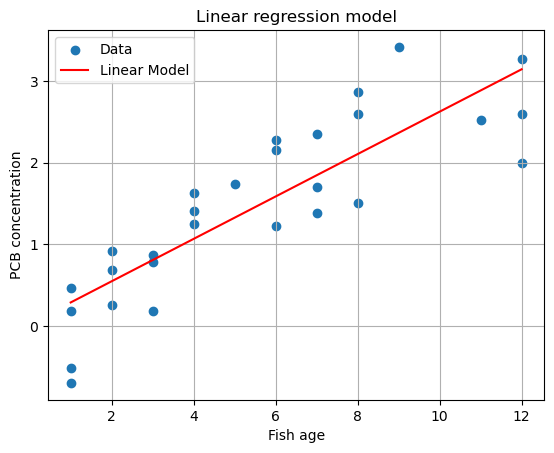

In [448]:
# plot the data and the model output.

# Create a range of values for Fish_age
Fish_age_range = np.linspace(min(Fish_age), max(Fish_age), num=50)

# Calculate the corresponding predictions for the range
predictions_range = a * Fish_age_range + b

# Plot the data and the linear model output
plt.scatter(Fish_age, Transformed_PCB_concentration, label='Data')
plt.plot(Fish_age_range, predictions_range, color='red', label='Linear Model')
plt.xlabel('Fish age')
plt.ylabel('PCB concentration')
plt.grid(True)
plt.title('Linear regression model')
plt.legend()
plt.show()


# 5.5

In [449]:
# Compute the coefficient of determination R2
# R^2 = 1 - MSE/var(y)

var_y = np.var(PCB_concentration)

R2 = 1 - mse/var_y

print("R2:", R2)

R2: 0.3570135731609866


# 5.6

In [450]:
#Load the data
data = np.loadtxt('PCB.dt')

def ExtractFirst(list):
	return [item[0] for item in list]

def ExtractLast(list):
	return [item[-1] for item in list]
	
#split the data into two parts
Fish_age = ExtractFirst(data)
PCB_concentration = ExtractLast(data)

New_Fish_age = np.sqrt(Fish_age)


# Adds a coloum of ones to the right of Fish_age
ones_column = np.ones_like(New_Fish_age)
X = np.column_stack((New_Fish_age, ones_column))


coefficients = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(PCB_concentration)
print("Bias, Slope:",coefficients)

#calculate the mean square error
predictions = X.dot(coefficients)
residuals = PCB_concentration - predictions
mse = (residuals.dot(residuals)) / len(PCB_concentration)
print("Mean Squared Error:", mse)



Bias, Slope: [ 6.80585324 -7.93630053]
Mean Squared Error: 26.008949957277633


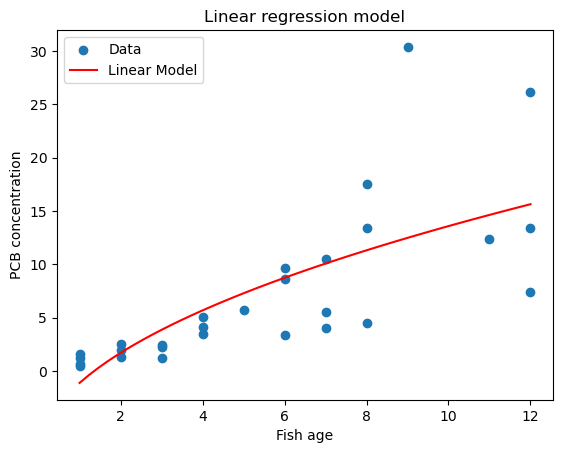

In [451]:

# plot the data and the model output.

# Create a range of values for Fish_age
Fish_age_range = np.linspace(min(Fish_age), max(Fish_age), num=50)

# Calculate the corresponding predictions for the range
predictions_range = coefficients[0] * np.sqrt(Fish_age_range) + coefficients[1]

# Plot the data and the linear model output
plt.scatter(Fish_age, PCB_concentration, label='Data')
plt.plot(Fish_age_range, predictions_range, color='red', label='Linear Model')
plt.xlabel('Fish age')
plt.ylabel('PCB concentration')
plt.title('Linear regression model')
plt.legend()
plt.show()
